# 각자 데이터 학습 시도

In [38]:
file_paths = ['visual/yim/log_train.txt','visual/ryu/log_train.txt','visual/bae/log_train.txt']
name=[]
for path in file_paths:
    x = path.split('/')[1]
    name.append(x)
name

['yim', 'ryu', 'bae']

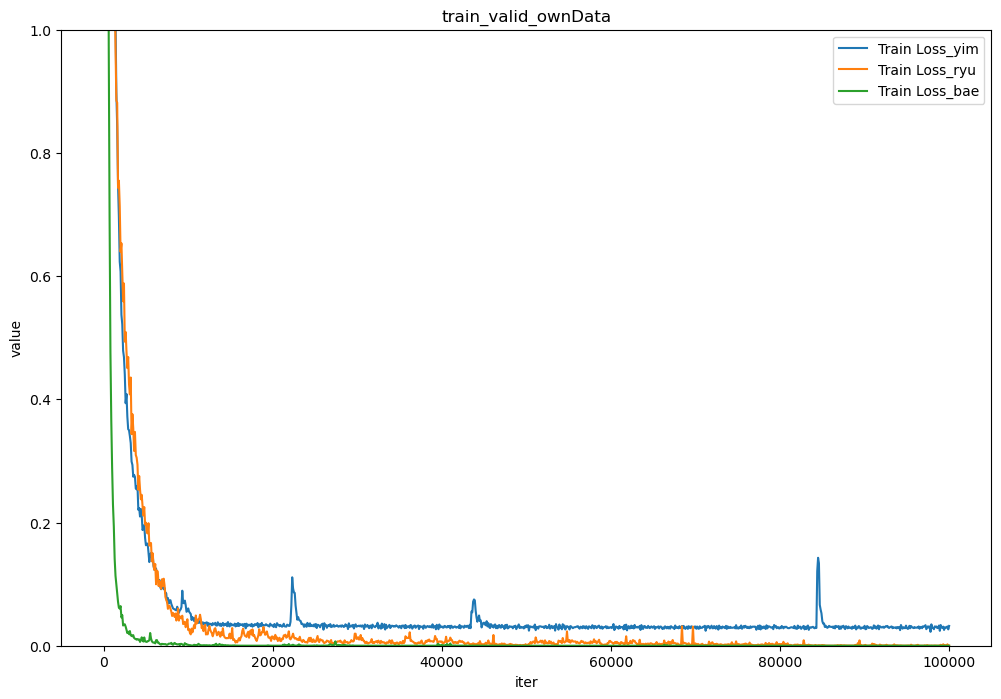

In [28]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
train_losses_dict={}
for i in range(len(file_paths)):
    with open(file_paths[i], 'r', encoding='utf-8') as file:
        lines = file.readlines()

    iters = []
    train_losses_list = []
    for line in lines:
        match_iter_loss = re.match(r'\[(\d+)/\d+\] Train loss: (\d+\.\d+), Valid loss: (\d+\.\d+), Elapsed_time: [\d.]+\s*', line)
        if match_iter_loss:
            iter, train_loss, valid_loss = map(float, match_iter_loss.groups())
            iters.append(iter)
            train_losses_list.append(train_loss)
            
    train_losses_dict[name[i]] = train_losses_list
            #valid_losses.append(valid_loss)

#         accuracy_match = re.search(r'Best_accuracy    : (\d+\.\d+)', line)
#         if accuracy_match:
#             accuracy = float(accuracy_match.group(1))
#             accuracies.append(accuracy)

#plt.figure(figsize=(12, 8))

for i in name:
    if i == 'bae':
        sns.lineplot(x=iters, y=train_losses_dict[i], label=f'Train Loss_{i}')
    else:
        sns.lineplot(x=iters,y=train_losses_dict[i][:1001],label=f'Train Loss_{i}')
    
plt.ylim([0,1])
plt.xlabel('iter')
plt.ylabel('value')
plt.title('train_valid_ownData')
plt.legend()

plt.show()


## train_loss

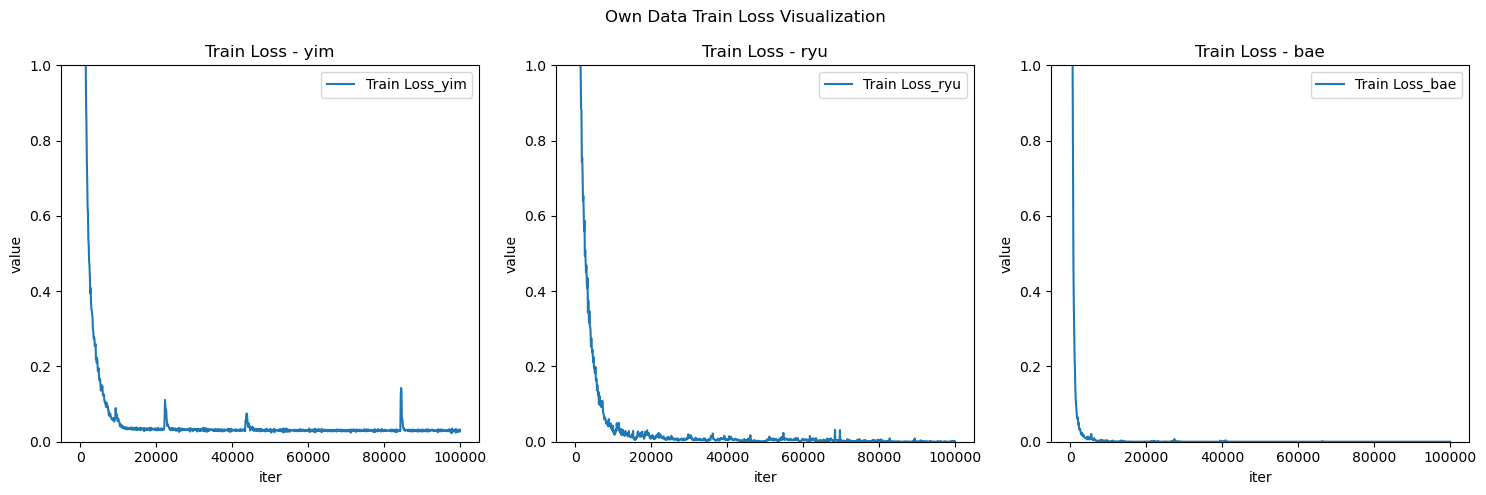

In [124]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

train_losses_dict={}
for i in range(len(file_paths)):
    with open(file_paths[i], 'r', encoding='utf-8') as file:
        lines = file.readlines()

    iters = []
    train_losses_list = []
    for line in lines:
        match_iter_loss = re.match(r'\[(\d+)/\d+\] Train loss: (\d+\.\d+), Valid loss: (\d+\.\d+), Elapsed_time: [\d.]+\s*', line)
        if match_iter_loss:
            iter, train_loss, valid_loss = map(float, match_iter_loss.groups())
            iters.append(iter)
            train_losses_list.append(train_loss)
            
    train_losses_dict[name[i]] = train_losses_list

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

for j, i in enumerate(name):
    if i == 'bae':
        sns.lineplot(x=iters, y=train_losses_dict[i], ax=axes[j], label=f'Train Loss_{i}')
    else:
        sns.lineplot(x=iters, y=train_losses_dict[i][:1001], ax=axes[j], label=f'Train Loss_{i}')

    axes[j].set_ylim([0, 1])
    axes[j].set_xlabel('iter')
    axes[j].set_ylabel('value')
    axes[j].set_title(f'Train Loss - {i}')
    axes[j].legend()

plt.suptitle('Own Data Train Loss Visualization')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## validation_loss

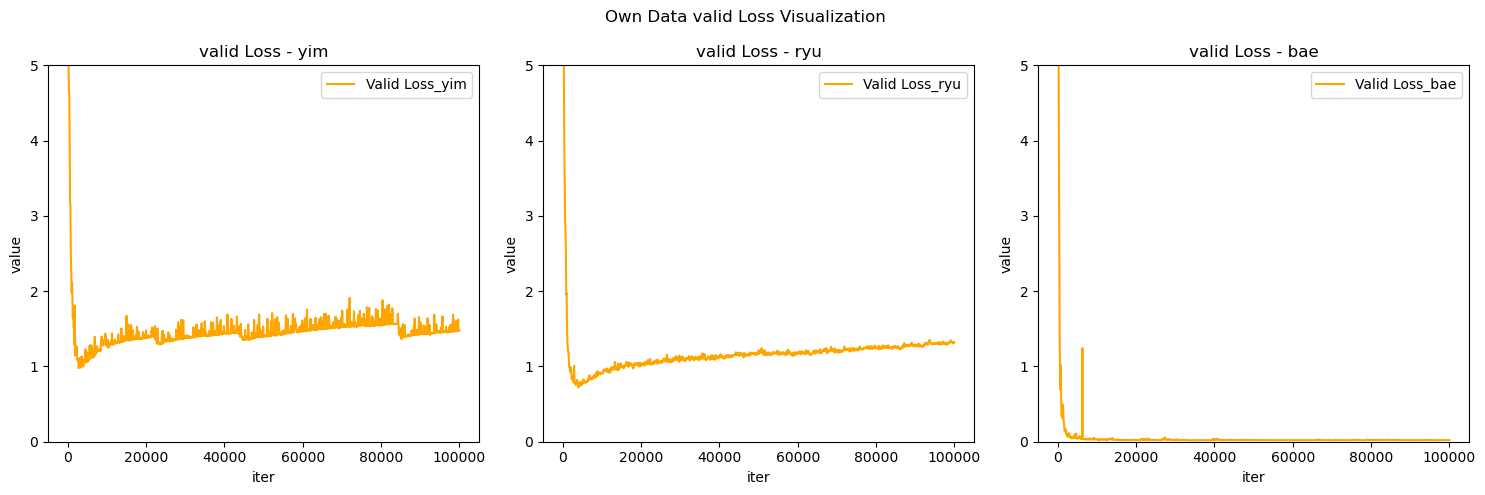

In [131]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

valid_losses_dict={}
for i in range(len(file_paths)):
    with open(file_paths[i], 'r', encoding='utf-8') as file:
        lines = file.readlines()

    iters = []
    valid_losses_list = []
    for line in lines:
        match_iter_loss = re.match(r'\[(\d+)/\d+\] Train loss: (\d+\.\d+), Valid loss: (\d+\.\d+), Elapsed_time: [\d.]+\s*', line)
        if match_iter_loss:
            iter, valid_loss, valid_loss = map(float, match_iter_loss.groups())
            iters.append(iter)
            valid_losses_list.append(valid_loss)
            
    valid_losses_dict[name[i]] = valid_losses_list

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

for j, i in enumerate(name):
    if i == 'bae':
        sns.lineplot(x=iters, y=valid_losses_dict[i], ax=axes[j], label=f'Valid Loss_{i}',color='orange')
    else:
        sns.lineplot(x=iters, y=valid_losses_dict[i][:1001], ax=axes[j], label=f'Valid Loss_{i}',color='orange')

    axes[j].set_ylim([0, 5])
    axes[j].set_xlabel('iter')
    axes[j].set_ylabel('value')
    axes[j].set_title(f'valid Loss - {i}')
    axes[j].legend()

plt.suptitle('Own Data valid Loss Visualization')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## accuracy

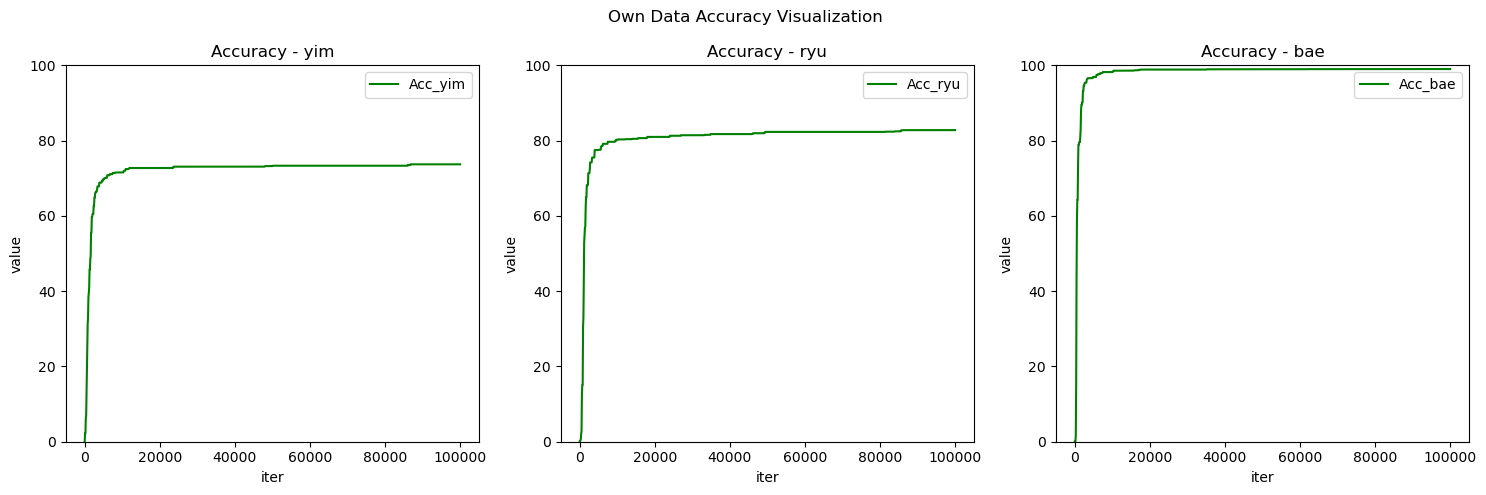

In [133]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

acces_dict={}
for i in range(len(file_paths)):
    with open(file_paths[i], 'r', encoding='utf-8') as file:
        lines = file.readlines()
    acces_list = []
    for line in lines:
        match_iter_acc = re.search(r'Best_accuracy    : (\d+\.\d+)', line)
        if match_iter_acc:
            acc = match_iter_acc.groups(1)[0]
            acces_list.append(float(acc))
            
            
    acces_dict[name[i]] = acces_list

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed
acces_dict['yim'] = acces_dict['yim'][:1001]
acces_dict['ryu'] =acces_dict['ryu'][:1001]

for j, i in enumerate(name):
    
    sns.lineplot(x=iters, y=acces_dict[i], ax=axes[j], label=f'Acc_{i}',color='green')

    axes[j].set_ylim([0, 100])
    axes[j].set_xlabel('iter')
    axes[j].set_ylabel('value')
    axes[j].set_title(f'Accuracy - {i}')
    axes[j].legend()

plt.suptitle('Own Data Accuracy Visualization')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


# 데이터 합쳐서 베이스 모델 서치

In [136]:
file_paths = ['visual/yim/log_train_alldata_vgg.txt','visual/ryu/log_train_alldata_Resnet.txt','visual/bae/log_train_alldata_rcnn.txt']

In [141]:
name=[]
for path in file_paths:
    x = path.split('/')[2]
    x = x.replace('log_train_','')
    x = x.replace('.txt','')
    x = x.upper()
    name.append(x)
name

['ALLDATA_VGG', 'ALLDATA_RESNET', 'ALLDATA_RCNN']

## train loss

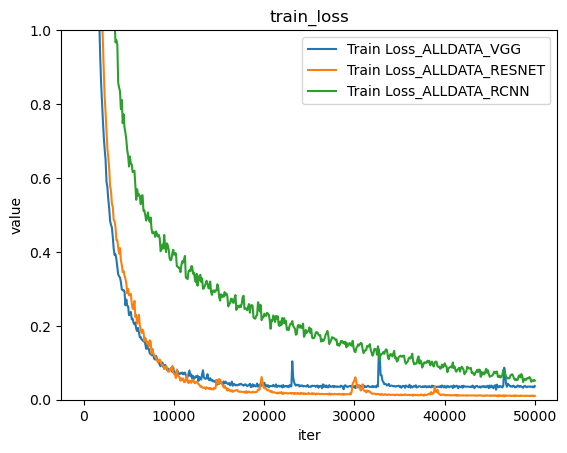

In [144]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
train_losses_dict={}
for i in range(len(file_paths)):
    with open(file_paths[i], 'r', encoding='utf-8') as file:
        lines = file.readlines()

    iters = []
    train_losses_list = []
    for line in lines:
        match_iter_loss = re.match(r'\[(\d+)/\d+\] Train loss: (\d+\.\d+), Valid loss: (\d+\.\d+), Elapsed_time: [\d.]+\s*', line)
        if match_iter_loss:
            iter, train_loss, valid_loss = map(float, match_iter_loss.groups())
            iters.append(iter)
            train_losses_list.append(train_loss)
            
    train_losses_dict[name[i]] = train_losses_list

for i in name:
    sns.lineplot(x=iters, y=train_losses_dict[i], label=f'Train Loss_{i}')
    
    
plt.ylim([0,1])
plt.xlabel('iter')
plt.ylabel('value')
plt.title('train_loss')
plt.legend()

plt.show()


## valid loss

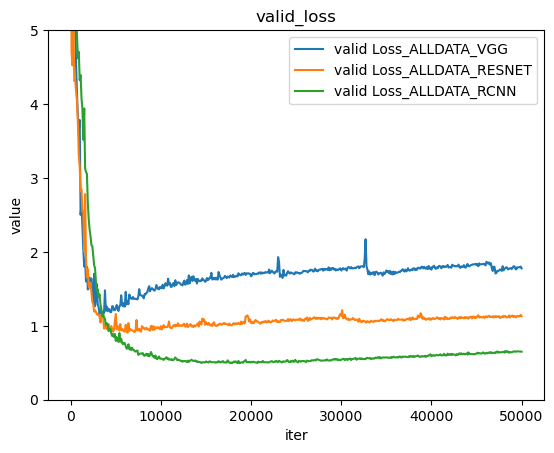

In [157]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
valid_losses_dict={}
for i in range(len(file_paths)):
    with open(file_paths[i], 'r', encoding='utf-8') as file:
        lines = file.readlines()

    iters = []
    valid_losses_list = []
    for line in lines:
        match_iter_loss = re.match(r'\[(\d+)/\d+\] Train loss: (\d+\.\d+), Valid loss: (\d+\.\d+), Elapsed_time: [\d.]+\s*', line)
        if match_iter_loss:
            iter, valid_loss, valid_loss = map(float, match_iter_loss.groups())
            iters.append(iter)
            valid_losses_list.append(valid_loss)
            
    valid_losses_dict[name[i]] = valid_losses_list

for i in name:
    sns.lineplot(x=iters, y=valid_losses_dict[i], label=f'valid Loss_{i}')
    
    
plt.ylim([0,5])
plt.xlabel('iter')
plt.ylabel('value')
plt.title('valid_loss')
plt.legend()

plt.show()


## Accuracy

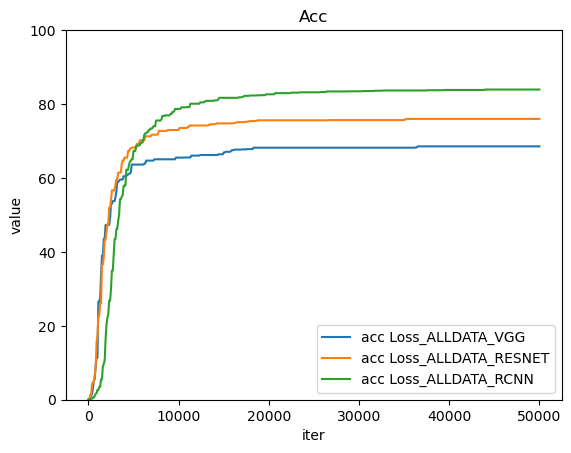

In [159]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
acc_dict={}
for i in range(len(file_paths)):
    with open(file_paths[i], 'r', encoding='utf-8') as file:
        lines = file.readlines()
    acc_list = []
    for line in lines:
        match_iter_acc = re.search(r'Best_accuracy    : (\d+\.\d+)', line)
        if match_iter_acc:
            acc = match_iter_acc.groups(1)[0]
            acc_list.append(float(acc))
            
            
    acc_dict[name[i]] = acc_list

for i in name:
    sns.lineplot(x=iters, y=acc_dict[i], label=f'acc Loss_{i}')
    
    
plt.ylim([0,100])
plt.xlabel('iter')
plt.ylabel('value')
plt.title('Acc')
plt.legend()

plt.show()


# TPS RCNN BiLSTM CTC로 베이스모델 선정

# imgW, imgH, batch size, hidden size, optimizer parameter tuning 시도

In [175]:
file_paths = ['visual/yim/log_train_alldata_img.txt','visual/yim/log_train_alldata_img_hiddensize.txt','visual/ryu/log_train_alldata_TunedAdadelta.txt','visual/bae/log_train_alldata_batchsize.txt','visual/bae/log_train_alldata_rcnn.txt']

In [177]:
name=[]
for path in file_paths:
    x = path.split('/')[2]
    x = x.replace('log_train_','')
    x = x.replace('.txt','')
    #x = x.upper()
    name.append(x)
name[4] = 'alldata_basemodel'

## train loss

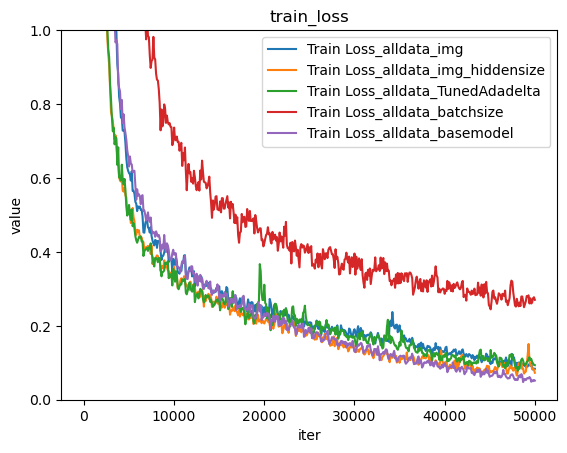

In [179]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
train_losses_dict={}
for i in range(len(file_paths)):
    with open(file_paths[i], 'r', encoding='utf-8') as file:
        lines = file.readlines()

    iters = []
    train_losses_list = []
    for line in lines:
        match_iter_loss = re.match(r'\[(\d+)/\d+\] Train loss: (\d+\.\d+), Valid loss: (\d+\.\d+), Elapsed_time: [\d.]+\s*', line)
        if match_iter_loss:
            iter, train_loss, valid_loss = map(float, match_iter_loss.groups())
            iters.append(iter)
            train_losses_list.append(train_loss)
            
    train_losses_dict[name[i]] = train_losses_list

for i in name:
    sns.lineplot(x=iters, y=train_losses_dict[i], label=f'Train Loss_{i}')
    
    
plt.ylim([0,1])
plt.xlabel('iter')
plt.ylabel('value')
plt.title('train_loss')
plt.legend()

plt.show()


## valid loss

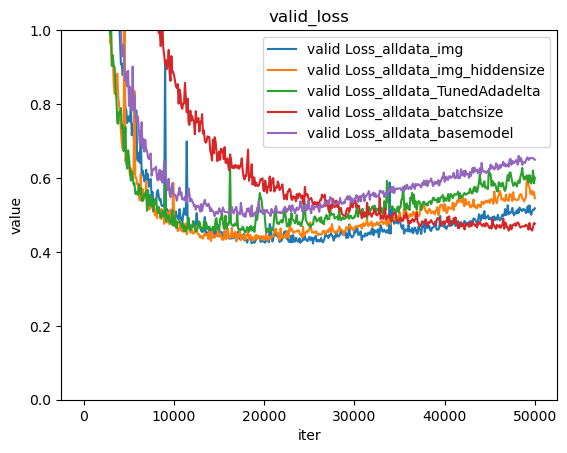

In [180]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
valid_losses_dict={}
for i in range(len(file_paths)):
    with open(file_paths[i], 'r', encoding='utf-8') as file:
        lines = file.readlines()

    iters = []
    valid_losses_list = []
    for line in lines:
        match_iter_loss = re.match(r'\[(\d+)/\d+\] Train loss: (\d+\.\d+), Valid loss: (\d+\.\d+), Elapsed_time: [\d.]+\s*', line)
        if match_iter_loss:
            iter, valid_loss, valid_loss = map(float, match_iter_loss.groups())
            iters.append(iter)
            valid_losses_list.append(valid_loss)
            
    valid_losses_dict[name[i]] = valid_losses_list

for i in name:
    sns.lineplot(x=iters, y=valid_losses_dict[i], label=f'valid Loss_{i}')
    
    
plt.ylim([0,1])
plt.xlabel('iter')
plt.ylabel('value')
plt.title('valid_loss')
plt.legend()

plt.show()


## Accuracy

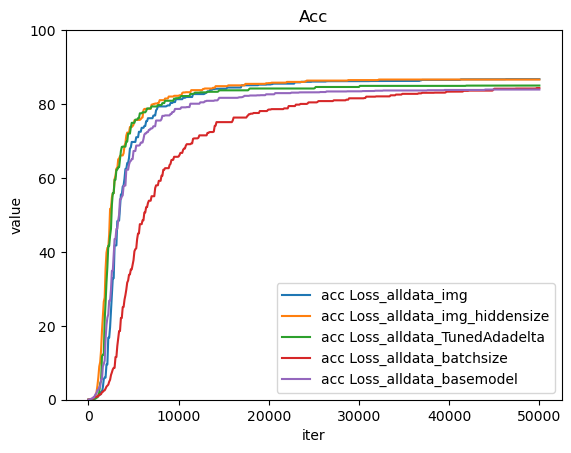

In [181]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
acc_dict={}
for i in range(len(file_paths)):
    with open(file_paths[i], 'r', encoding='utf-8') as file:
        lines = file.readlines()
    acc_list = []
    for line in lines:
        match_iter_acc = re.search(r'Best_accuracy    : (\d+\.\d+)', line)
        if match_iter_acc:
            acc = match_iter_acc.groups(1)[0]
            acc_list.append(float(acc))
            
            
    acc_dict[name[i]] = acc_list

for i in name:
    sns.lineplot(x=iters, y=acc_dict[i], label=f'acc Loss_{i}')
    
    
plt.ylim([0,100])
plt.xlabel('iter')
plt.ylabel('value')
plt.title('Acc')
plt.legend()

plt.show()


# Test

In [188]:
test_df = pd.DataFrame()
test_df['model'] = ['batchsize','basemodel','img_hiddensize','img','adadelta tuning']
test_df['test score'] = [86.768,86.491,88.684,88.981,87.523]

Text(0.5, 1.0, 'Test_Acc')

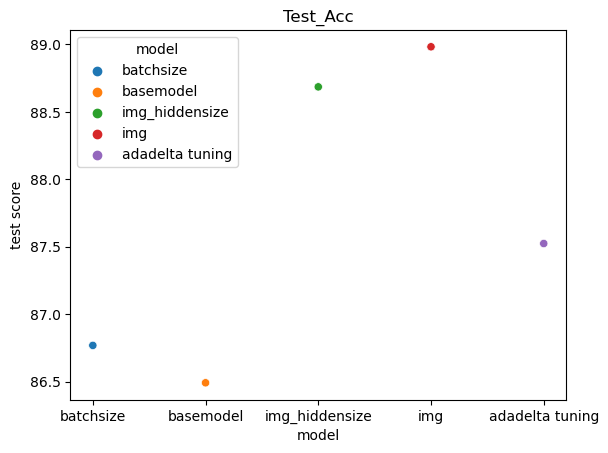

In [191]:
sns.scatterplot(x='model',y='test score',data=test_df,hue='model')
plt.title('Test_Acc')

# 최종 선정 모델 : TPS RCNN BiLSTM CTC imgH imgW 1.25배 증가

In [1]:
file_paths = ['visual/yim/log_train_alldata_img.txt']

In [3]:
name=[]
for path in file_paths:
    x = path.split('/')[2]
    x = x.replace('log_train_','')
    x = x.replace('.txt','')
    #x = x.upper()
    name.append(x)

## train loss

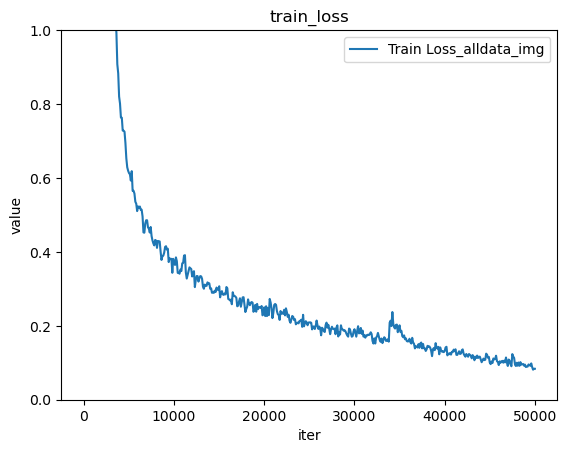

In [4]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
train_losses_dict={}
for i in range(len(file_paths)):
    with open(file_paths[i], 'r', encoding='utf-8') as file:
        lines = file.readlines()

    iters = []
    train_losses_list = []
    for line in lines:
        match_iter_loss = re.match(r'\[(\d+)/\d+\] Train loss: (\d+\.\d+), Valid loss: (\d+\.\d+), Elapsed_time: [\d.]+\s*', line)
        if match_iter_loss:
            iter, train_loss, valid_loss = map(float, match_iter_loss.groups())
            iters.append(iter)
            train_losses_list.append(train_loss)
            
    train_losses_dict[name[i]] = train_losses_list

for i in name:
    sns.lineplot(x=iters, y=train_losses_dict[i], label=f'Train Loss_{i}')
    
    
plt.ylim([0,1])
plt.xlabel('iter')
plt.ylabel('value')
plt.title('train_loss')
plt.legend()

plt.show()


## valid loss

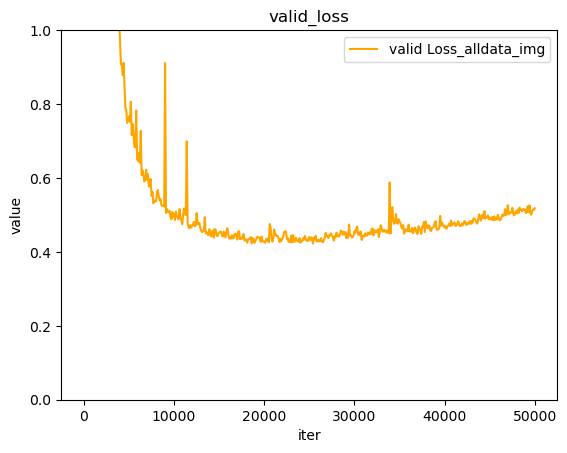

In [5]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
valid_losses_dict={}
for i in range(len(file_paths)):
    with open(file_paths[i], 'r', encoding='utf-8') as file:
        lines = file.readlines()

    iters = []
    valid_losses_list = []
    for line in lines:
        match_iter_loss = re.match(r'\[(\d+)/\d+\] Train loss: (\d+\.\d+), Valid loss: (\d+\.\d+), Elapsed_time: [\d.]+\s*', line)
        if match_iter_loss:
            iter, valid_loss, valid_loss = map(float, match_iter_loss.groups())
            iters.append(iter)
            valid_losses_list.append(valid_loss)
            
    valid_losses_dict[name[i]] = valid_losses_list

for i in name:
    sns.lineplot(x=iters, y=valid_losses_dict[i], label=f'valid Loss_{i}',color='orange')
    
    
plt.ylim([0,1])
plt.xlabel('iter')
plt.ylabel('value')
plt.title('valid_loss')
plt.legend()

plt.show()


## Accuracy

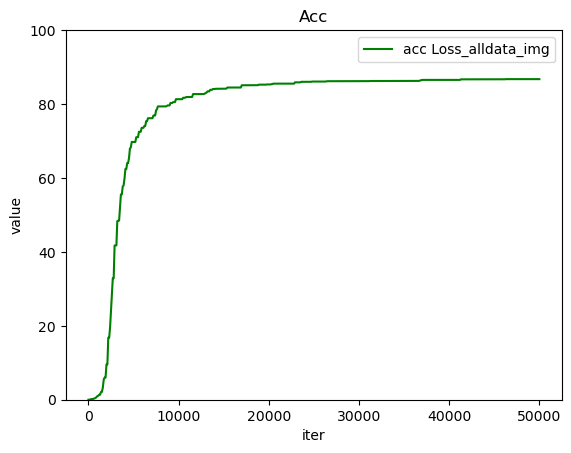

In [6]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
acc_dict={}
for i in range(len(file_paths)):
    with open(file_paths[i], 'r', encoding='utf-8') as file:
        lines = file.readlines()
    acc_list = []
    for line in lines:
        match_iter_acc = re.search(r'Best_accuracy    : (\d+\.\d+)', line)
        if match_iter_acc:
            acc = match_iter_acc.groups(1)[0]
            acc_list.append(float(acc))
            
            
    acc_dict[name[i]] = acc_list

for i in name:
    sns.lineplot(x=iters, y=acc_dict[i], label=f'acc Loss_{i}',color='green')
    
    
plt.ylim([0,100])
plt.xlabel('iter')
plt.ylabel('value')
plt.title('Acc')
plt.legend()

plt.show()
